In [28]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

sns.set(style="whitegrid")

In [5]:
# load dataset
df = pd.read_csv("../data/water_potability.csv")

#preview data
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [30]:
# check for missing value
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [33]:
# fill missing data with median and check again
df.fillna(df.median(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

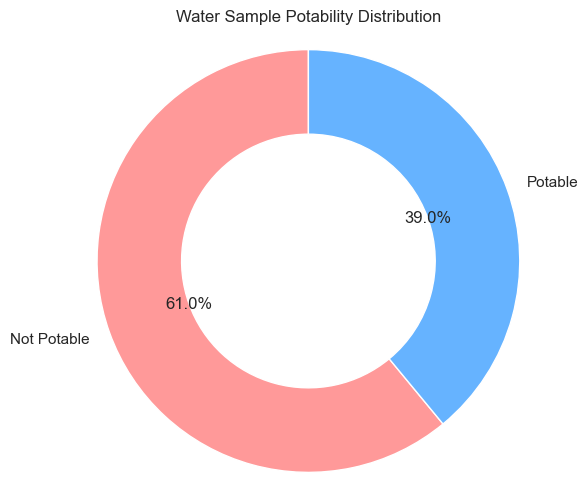

In [34]:
# Count potability values
labels = ['Not Potable', 'Potable']
counts = df['Potability'].value_counts().sort_index()  # 0 not potable, 1 potable

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], wedgeprops={'width': 0.4})
plt.title('Water Sample Potability Distribution')
plt.axis('equal')
plt.show()

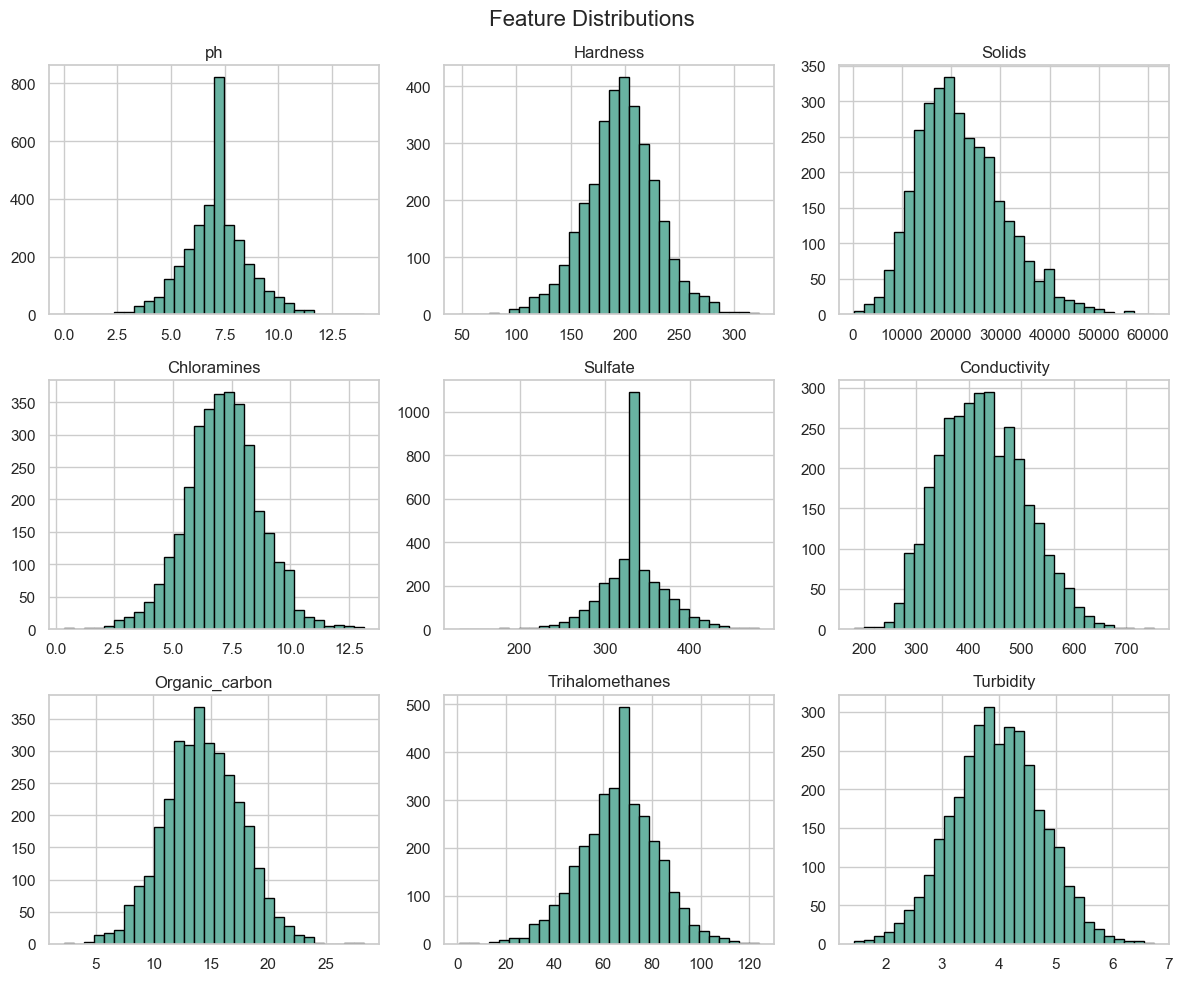

In [35]:
# Drop Potability if you want to focus on continuous features
features = df.drop(columns='Potability')

# Plot histograms for each water feature
features.hist(bins=30, figsize=(12, 10), color="#69b3a2", edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

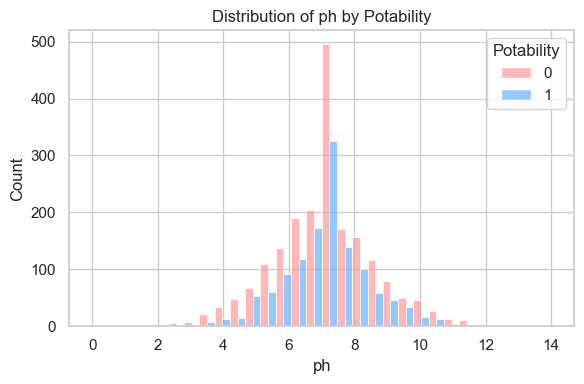

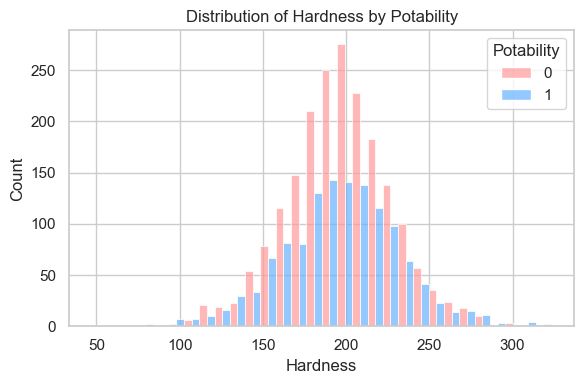

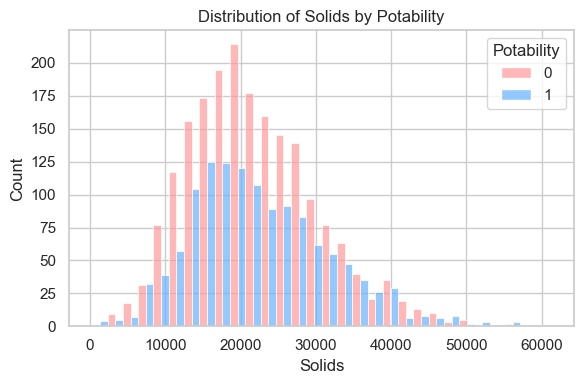

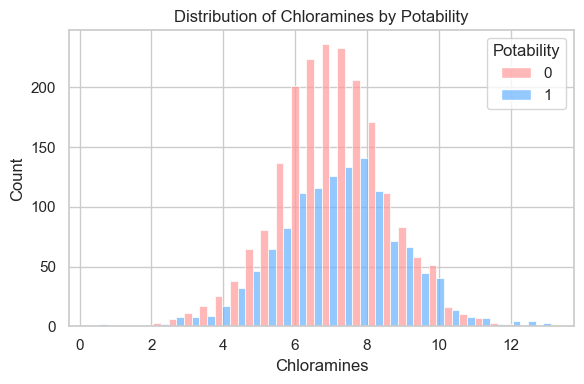

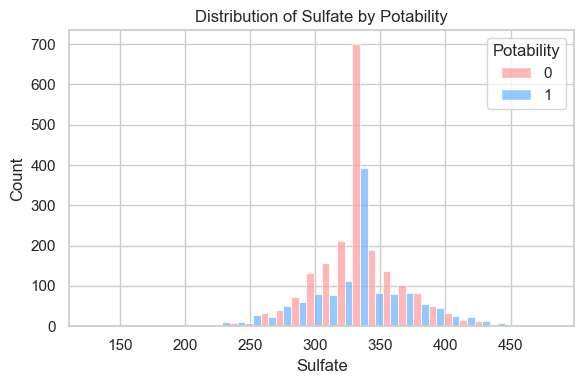

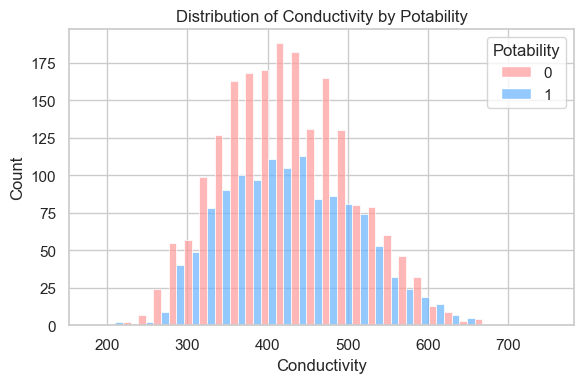

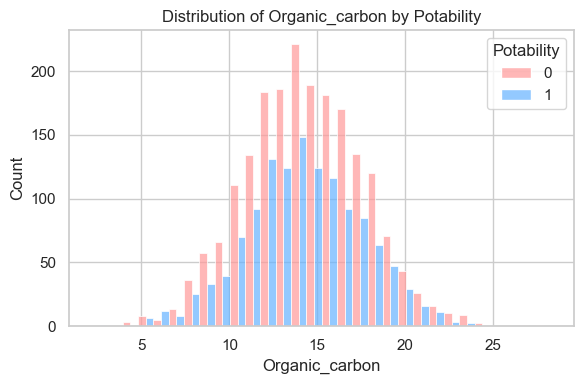

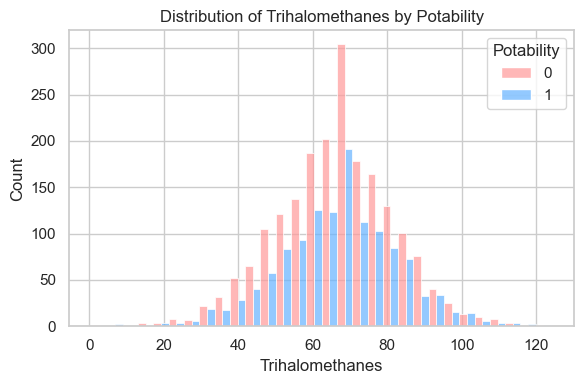

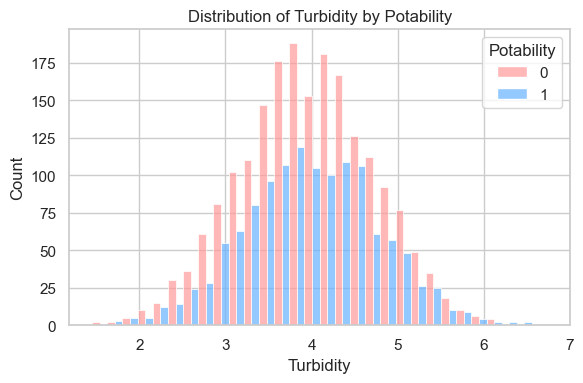

In [36]:
# Plot histogram for each feature by Potability
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='Potability', bins=30, kde=False, multiple='dodge',palette=['#ff9999','#66b3ff'], alpha=0.7)
    plt.title(f'Distribution of {feature} by Potability')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [37]:
# water feature corelation with water potability
corr = df.corr()
corr['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006887
Turbidity          0.001581
ph                -0.003014
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020476
Organic_carbon    -0.030001
Name: Potability, dtype: float64

In [24]:
unsafe = df[df['Potability'] == 0]
unsafe.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [38]:
# Compare group means
df.groupby('Potability').mean().T

Potability,0,1
ph,7.077736,7.068655
Hardness,196.733292,195.800744
Solids,21777.490788,22383.991018
Chloramines,7.092175,7.169338
Sulfate,334.200184,332.683125
Conductivity,426.730454,425.383800
Organic_carbon,14.364335,14.160893
Trihalomethanes,66.320635,66.543247
Turbidity,3.965800,3.968328


In [39]:
# Use t-test to check if difference in feature means is statistically significant, p<0.05 suggest significant difference
for feature in features:
    group0 = df[df['Potability'] == 0][feature]
    group1 = df[df['Potability'] == 1][feature]
    stat, p = ttest_ind(group0, group1)
    print(f"{feature:20} p-value: {p:.4f}")

ph                   p-value: 0.8631
Hardness             p-value: 0.4285
Solids               p-value: 0.0535
Chloramines          p-value: 0.1736
Sulfate              p-value: 0.2413
Conductivity         p-value: 0.6419
Organic_carbon       p-value: 0.0860
Trihalomethanes      p-value: 0.6936
Turbidity            p-value: 0.9279
